In [2]:
import pandas as pd 
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA

In [3]:
#Ler arquivo e converter coluna mes para tipo data, deixando ela como index da base 

dateparse = lambda dates : pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                    index_col = 'Month', date_parser = dateparse)

In [4]:
#Mudando o tipo para Series 
ts=base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

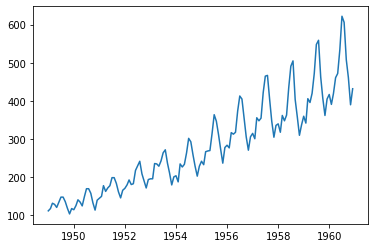

In [6]:
plt.plot(ts)

In [9]:
#p numero de termos alto regressivos
#q é o numero da média móvel
#d é a diferença não sazonais
modelo = ARIMA(ts,order=[2,1,2])
modelo_treinado = modelo.fit()

C:\Users\vanes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vanes\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [11]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.711
Date:                Sat, 14 Dec 2019   AIC                           1344.043
Time:                        09:31:33   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.523      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9999      0.068     14.807      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [12]:
#steps = quandidade de previsoes que quer fazer 
previsoes = modelo_treinado.forecast(steps=12)[0]
print(previsoes)

[433.10443805 450.85992583 479.77394432 511.93163069 539.28641302
 555.77757633 558.73631406 549.27679226 531.66185176 511.90223092
 496.02530936 488.49635091]


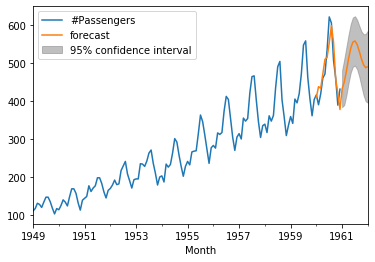

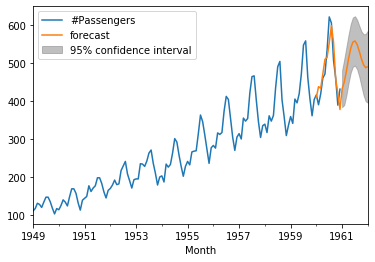

In [22]:
eixo = ts.plot()
#aonde começa os dados que serão usados para prever até o final do valor da previsão
modelo_treinado.plot_predict('1960-01-01', '1962-01-01',
                                ax = eixo,plot_insample=False)
